**BIG DATA ANALTICS USING E-COMMERCE** **DATA**

In [1]:
# 1. INSTALL & IMPORT PACKAGES
# ====================================
!pip install plotly pandas numpy seaborn wordcloud pyspark

import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from google.colab import data_table
from pyspark.sql import SparkSession

# Enable interactive table mode
data_table.enable_dataframe_formatter()

In [4]:
# 2. LOAD DATA

# Replace with your dataset file path or public CSV URL
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
df = pd.read_csv(url)

print("📊 Interactive Data Table (Pandas):")
df

📊 Interactive Data Table (Pandas):


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
# 3.LOAD BIG DATA WITH PYSPARK
# ====================================
spark = SparkSession.builder.appName("ECommerceBigData").getOrCreate()

# Example: load the same CSV into Spark (for millions of rows)
# PySpark's read.csv does not directly support reading from a URL.
# Download the file locally first.
import urllib.request
import os

local_path = "/tmp/tips.csv"
if not os.path.exists(local_path):
    urllib.request.urlretrieve(url, local_path)

spark_df = spark.read.csv(local_path, header=True, inferSchema=True)
print("\nSchema in Spark:")
spark_df.printSchema()

# Convert Spark -> Pandas (only if dataset fits in memory for plotting)
df_spark_to_pandas = spark_df.toPandas()


Schema in Spark:
root
 |-- total_bill: double (nullable = true)
 |-- tip: double (nullable = true)
 |-- sex: string (nullable = true)
 |-- smoker: string (nullable = true)
 |-- day: string (nullable = true)
 |-- time: string (nullable = true)
 |-- size: integer (nullable = true)



In [9]:
# 4. BASIC CLEANING

df.drop_duplicates(inplace=True)
df.ffill(inplace=True) # Forward fill missing values
display(df)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
# 5. EXPLORATORY DATA ANALYSIS

print("\nSummary Stats:")
df.describe(include='all')


Summary Stats:


,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


In [14]:
# 6. ADVANCED VISUALIZATIONS
# ====================================

# Interactive Histogram
fig = px.histogram(df, x="total_bill", nbins=20, title="Distribution of Total Bill")
fig.show()

# Interactive Scatter Plot
fig = px.scatter(df, x="total_bill", y="tip", color="sex", size="size",
                 title="Tips vs Total Bill")
fig.show()

# Box Plot
fig = px.box(df, x="day", y="total_bill", color="sex",
             title="Total Bill Distribution by Day")
fig.show()

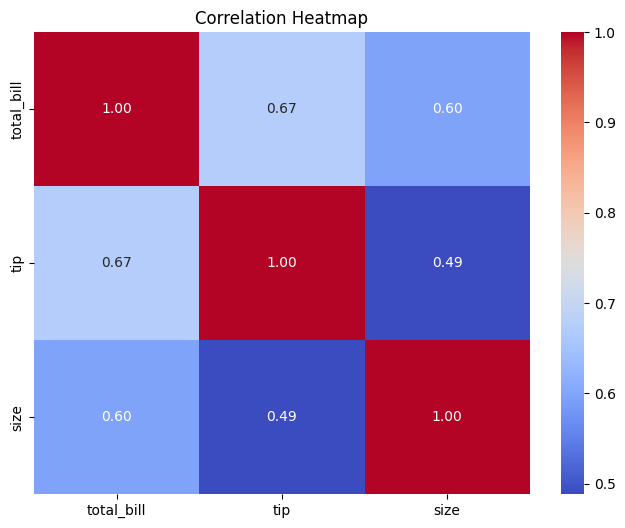

In [15]:
# 7. HEATMAP

corr = df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

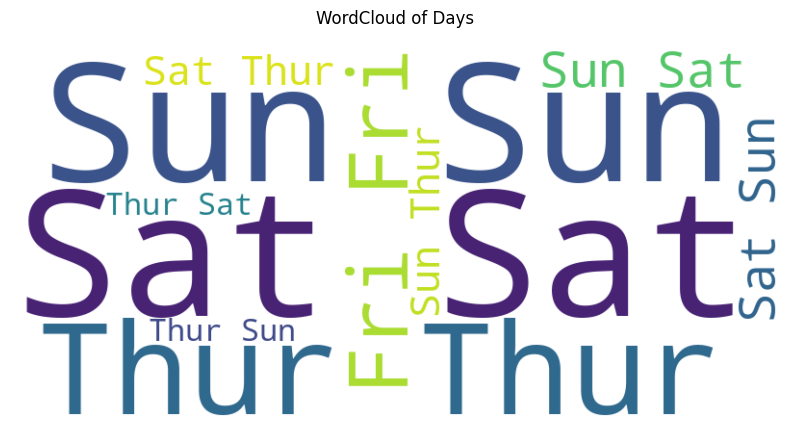

In [16]:
# 8. WORDCLOUD

if "day" in df.columns:
    text = " ".join(df['day'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud of Days")
    plt.show()

In [17]:
# 9. GROUP-BY & INTERACTIVE BAR CHART

grouped = df.groupby("day").agg({"total_bill": "sum", "tip": "mean"}).reset_index()

print("\nAggregated Sales Data by Day:")
grouped  # Interactive table

fig = px.bar(grouped, x="day", y="total_bill", color="tip",
             title="Total Bill by Day with Average Tip")
fig.show()


Aggregated Sales Data by Day:
